In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import time

### Problem 1: Local clustering coefficient vs degree

In [2]:
def avg_clust_coeff(graph):
    clust_coeff_k = {}
    deg = nx.degree(graph) # Find the degrees of each and every vertex
    degrees = {i[1]:[] for i in deg} # Get all the unique degree values and initialize them as keys in a dict
    for i, j in deg: # Assign all the vertices as values with their respective degrees as keys
        degrees[j].append(i)
    # Find the clustering coefficient of all the vertices with degree K and compute the average clustering coefficients
    coeff = nx.clustering(graph)
    for i, j in zip(degrees.keys(), degrees.values()):
        coeff_sum = 0
        for a in j:
            coeff_sum += coeff[a]
        clust_coeff_k[i] = coeff_sum/len(j)
    
    # Printing the clustering coefficients of all possible values of degrees. 
    print("The print statement below is a dictionary where the keys are degree values and their respective values are the average clustering coefficients")
    print(clust_coeff_k)
    return clust_coeff_k 

In [3]:
G = nx.Graph()
G.add_nodes_from([0,1,2,3,4,5,6])
G.add_edges_from([(0, 1), (0, 2), (1,2), (1,3), (1,4), (2,3), (5,6)])
avg_clust_coeff(G)

The print statement below is a dictionary where the keys are degree values and their respective values are the average clustering coefficients
{2: 1.0, 4: 0.3333333333333333, 3: 0.6666666666666666, 1: 0.0}


{2: 1.0, 4: 0.3333333333333333, 3: 0.6666666666666666, 1: 0.0}

### 2. What is the computational complexity of your function? Express in terms of graph parameters (number of vertices n, number of edges m and degree).

The computational complexity of the function above is O(md). Despite, the looping over all the vertices being O(v), the nx.clustering will still have a greater complexity which is O(md) where m is the number of edges and d is the degree of the graph. The number of edges will by itself usually greater than the number of vertices. And it's also times the degree value. Hence, the complexity will be O(md).

### 3. Use your Python code to group local clustering coefficient by degree for the Web-Google network (posted on Canvas). Draw a scatter plot with x-axis denoting degree of vertices and y-axis denoting the average clustering coefficient for a particular degree. Please explain how this plot is different from the clustering coefficient distribution plot shown in the class for the webGoogle hyperlink network.

In [4]:
file='web-Google.txt'
google = nx.read_adjlist(file)

In [5]:
n = google.number_of_nodes()
m = google.number_of_edges()
print("Number of vertices in web-Google:", n, "\nNumber of edges in web-Google: ", m)

Number of vertices in web-Google: 875713 
Number of edges in web-Google:  4322051


In [6]:
clust_coeff = avg_clust_coeff(google)

The print statement below is a dictionary where the keys are degree values and their respective values are the average clustering coefficients
{212: 0.057756316631394876, 203: 0.07430057139855707, 14: 0.6897701148054154, 208: 0.09260212103021466, 210: 0.05343358395989974, 28: 0.4501812854402524, 94: 0.1603024063559409, 38: 0.3576499263289284, 15: 0.6848245560752506, 23: 0.5456185754902686, 13: 0.7001730599326439, 6: 0.6309728266350154, 11: 0.698624647928335, 37: 0.36845971935946176, 8: 0.6878429568079909, 21: 0.6022648974614107, 1158: 0.008148940966080164, 2500: 0.004508043217286915, 66: 0.23788768126117515, 42: 0.32265562544308224, 46: 0.31534078595048826, 32: 0.38819592146205034, 47: 0.3127169007372528, 73: 0.19445012381017285, 7: 0.6583104544045632, 5: 0.6155413503795583, 10: 0.7030632494433842, 96: 0.15682363804247465, 106: 0.15483745813934505, 2057: 0.005247338025797836, 97: 0.16459430065072755, 100: 0.13792795208724415, 99: 0.14804016844833173, 102: 0.14264009521156723, 31: 0.392

In [7]:
print(clust_coeff)

{212: 0.057756316631394876, 203: 0.07430057139855707, 14: 0.6897701148054154, 208: 0.09260212103021466, 210: 0.05343358395989974, 28: 0.4501812854402524, 94: 0.1603024063559409, 38: 0.3576499263289284, 15: 0.6848245560752506, 23: 0.5456185754902686, 13: 0.7001730599326439, 6: 0.6309728266350154, 11: 0.698624647928335, 37: 0.36845971935946176, 8: 0.6878429568079909, 21: 0.6022648974614107, 1158: 0.008148940966080164, 2500: 0.004508043217286915, 66: 0.23788768126117515, 42: 0.32265562544308224, 46: 0.31534078595048826, 32: 0.38819592146205034, 47: 0.3127169007372528, 73: 0.19445012381017285, 7: 0.6583104544045632, 5: 0.6155413503795583, 10: 0.7030632494433842, 96: 0.15682363804247465, 106: 0.15483745813934505, 2057: 0.005247338025797836, 97: 0.16459430065072755, 100: 0.13792795208724415, 99: 0.14804016844833173, 102: 0.14264009521156723, 31: 0.3929255537928202, 18: 0.6649912821561934, 12: 0.6991491088525824, 17: 0.6706870027839529, 41: 0.3313077736941752, 19: 0.6684499325667669, 16: 0.68

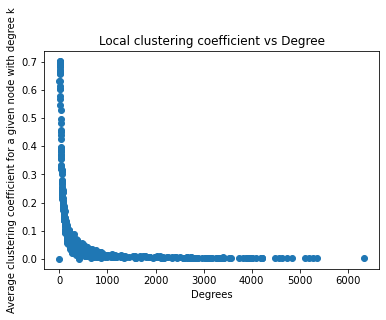

In [8]:
plt.scatter(x = clust_coeff.keys(), y = clust_coeff.values())
plt.title("Local clustering coefficient vs Degree")
plt.xlabel("Degrees")
plt.ylabel("Average clustering coefficient for a given node with degree k")
plt.show()

The clustering coefficient distribution plot shown in the class for the Google hyperlink network shows for a given clustering coefficient, how many vertices have that coefficient irrespective of the degrees of the vertices. So, it has nothing to do with degrees. We are directly finding the clustering coefficient of all vertices without categorizing them under degrees and just plotting that graph. And finally, finding the sum of all those coefficents and dividing it by the total number of nodes to get the average clustering coefficient. 

But here we are categorizing all the vertices under their respective degree value and then calculating the average clustering coefficient degree wise and finally plotting it.

### Problem 2: Erdos-Reyni vs social networks

### 1. What is the average degree of G(n, p)? Express the average degree with n and p.

The average degree of G(n,p) is p(n-1) where is the probability an edge connection is present between two vertices and n is the total number of vertices.

### 2. If we keep p constant, how does the average degree change as the size of the network (n) increases? Do you expect the same behavior in a social network?

The average degree will change. It should increase as the size of the network grows while p remains constant. We know that the average is p(n-1). So, we can prove this by calculating the average degree for some examples. Let's take a random graph with p = 0.7 and n = 10. The average degree will be 0.7 * 9 which is approximately 7. If we take a graph with p = 0.7 and n = 50, average degree = 0.7 * 49 ~ 35. So, the average does change. 

In a social network it depends. There is no defined p in this case, but if we were to assume that there is one and it is constant, then we can expect similar behaviour. In reality, the degree distribution of an actual social network is very different. It will not look a like a normal distribution and there cannot be a defined p. And so if we are thinking of an actual social network without any assumptions on top of it, then we cannot expect similar behaviour as in the above random graph with a constant p scenario. 

### Problem 3: Characteristics of real networks

Defining all the needed functions to plot

In [9]:
def plot_distribution (data, xlabel='', ylabel='', title='', xlog = True, ylog= True, showLine=False, intAxis=False) :
    counts = {}
    for item in data:
        if item not in counts:
            counts[item] = 0
        counts[item] += 1
    counts = sorted(counts.items())
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter([k for (k,v) in counts], [v for (k,v) in counts])
    if(len(counts)<20):  # for tiny graph
        showLine=True
    if showLine==True:
        ax.plot ([k for (k,v) in counts], [v for (k,v) in counts])
    if xlog == True:
        ax.set_xscale('log')
    if ylog == True:
        ax.set_yscale('log')
    if intAxis == True:
        gca = fig.gca()
        gca.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.title(title)
    

In [10]:
def Degree_Distribution(G, title):
    start = time.time()
    #your code
    degree = G.degree()
    degree = [deg for (v,deg) in degree]
    print("Average degree = ", sum(degree)/len(degree))
    end = time.time()
    print("Time taken to calculate the average degree", end - start)
    plot_distribution(degree, xlabel='Degree', ylabel='Number of nodes with degree k', title=title)

In [11]:
def connected_components(G, title):
    start = time.time()
    cc_sorted = sorted(nx.connected_components(G), key=len, reverse=True)
    topcc = min(len(cc_sorted), 5)
    for i in  range(topcc):
        cc = cc_sorted[i]
        cc_graph = G.subgraph(cc)
        n = cc_graph.number_of_nodes()
        m = cc_graph.number_of_edges()
        n_percent = (n/G.number_of_nodes()) * 100
        print("Largest component #", i+1)
        end = time.time()
        print("Time taken to compute the largest component = ", end - start)
        print("Number of vertices:", n, " (", n_percent, ")", "\nNumber of edges: ", m, "\n")

    cc_sizes = [len(c) for c in cc_sorted]
    plot_distribution(cc_sizes, xlabel='Weakly connected component size', 
                  ylabel='Count', title=title)

In [12]:
def Clustering_Analysis(G, title):
    start = time.time()
    #your code
    clust = nx.clustering(G)
    local_clust_coefficient = [ v for v in clust.values() ]
    avg_clust_coefficient = sum(local_clust_coefficient)/G.number_of_nodes()
    print("Average clustering coefficient: ", avg_clust_coefficient)
    end = time.time()
    print("Time taken to compute the average clustering coefficient = ", end - start)
    plot_distribution(local_clust_coefficient, xlabel='Clustering coefficient', 
                  ylabel='Number of vertices', title=title,
                      xlog=False, ylog=True, showLine=False)

In [13]:
def ShortestPaths_Analysis(G, title):
    start = time.time()
    #your code
    cc_sorted = sorted(nx.connected_components(G), key=len, reverse=True)

    topcc = min(len(cc_sorted), 1)
    for i in range(topcc) :
        cc = cc_sorted[i]
        cc_graph = G.subgraph(cc)
      
        if(len(cc)>5000):
            print("This component is too large. Using ten single-source shortest paths.")
            cc = list(cc)
            cc_graph = G.subgraph(cc)
            shortest_path_lens = []
            for i in range(10):
                length = nx.single_source_shortest_path_length(cc_graph, cc[i]) 
                shortest_path_lens += [ v for v in length.values() ]
        else:
            all_shortest_path_dict = dict(nx.all_pairs_shortest_path_length(cc_graph))
            shortest_path_lens = []
            for val1 in all_shortest_path_dict.values():
                for val in val1.values():
                    shortest_path_lens.append(val)
        
        print("Average shortest path length = ", sum(shortest_path_lens)/len(shortest_path_lens))
        print("The diameter of the graph is = ", max(shortest_path_lens))
        end = time.time()
        print("Time taken to compute the average shortest path length and diameter = ", end - start)
        plot_distribution(shortest_path_lens, xlabel='Shortest path lengths (hops)', 
                  ylabel='Number of paths', title=title,
                      xlog=False, ylog=False, showLine=True, intAxis=True)
    

In [14]:
# This was take from collabration networks

collaboration_data='ca-HepPh.txt.gz'
collaboration = nx.read_adjlist(collaboration_data)
n = collaboration.number_of_nodes()
m = collaboration.number_of_edges()
print("Number of vertices in the collaboration graph :", n, "\nNumber of edges in the collaboration graph : ", m)

Number of vertices in the collaboration graph : 12008 
Number of edges in the collaboration graph :  118521


In [15]:
# This was taken from the internet peer-to-peer networks

gnutella_data="p2p-Gnutella04.txt.gz"
gnutella = nx.read_adjlist(gnutella_data)
n = gnutella.number_of_nodes()
m = gnutella.number_of_edges()
print("Number of vertices in gnutella submissions :", n, "\nNumber of edges in gnutella submissions: ", m)

Number of vertices in gnutella submissions : 10876 
Number of edges in gnutella submissions:  39994


### Degree distributions

Average degree =  19.740339773484344
Time taken to calculate the average degree 0.006036043167114258
Average degree =  7.354542111070247
Time taken to calculate the average degree 0.003454923629760742


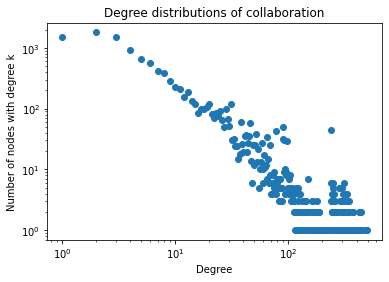

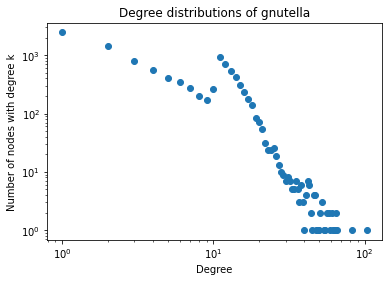

In [16]:
Degree_Distribution(collaboration, title='Degree distributions of collaboration')
Degree_Distribution(gnutella, title='Degree distributions of gnutella')

### Connected components sizes

Largest component # 1
Time taken to compute the largest component =  0.13342690467834473
Number of vertices: 11204  ( 93.30446369087275 ) 
Number of edges:  117649 

Largest component # 2
Time taken to compute the largest component =  0.1335921287536621
Number of vertices: 13  ( 0.10826115922718188 ) 
Number of edges:  35 

Largest component # 3
Time taken to compute the largest component =  0.1336956024169922
Number of vertices: 10  ( 0.0832778147901399 ) 
Number of edges:  45 

Largest component # 4
Time taken to compute the largest component =  0.1337890625
Number of vertices: 10  ( 0.0832778147901399 ) 
Number of edges:  26 

Largest component # 5
Time taken to compute the largest component =  0.13387036323547363
Number of vertices: 8  ( 0.06662225183211193 ) 
Number of edges:  12 

Largest component # 1
Time taken to compute the largest component =  0.0624079704284668
Number of vertices: 10876  ( 100.0 ) 
Number of edges:  39994 



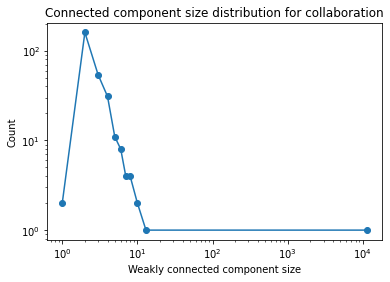

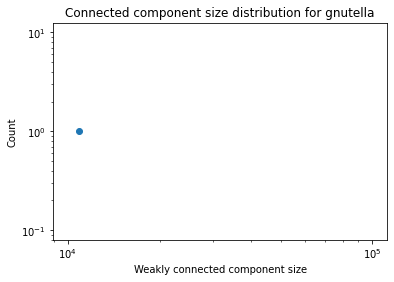

In [17]:
connected_components(collaboration, title='Connected component size distribution for collaboration')
connected_components(gnutella, title='Connected component size distribution for gnutella')

Average clustering coefficient:  0.6114825236824339
Time taken to compute the average clustering coefficient =  2.4231374263763428
Average clustering coefficient:  0.0062175327714660625
Time taken to compute the average clustering coefficient =  0.20154309272766113


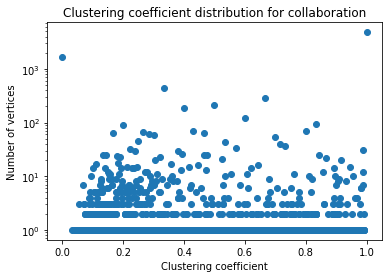

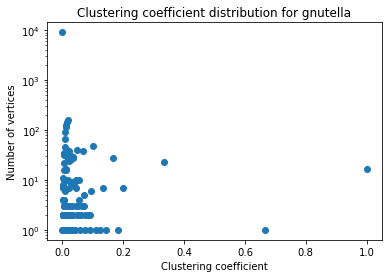

In [18]:
Clustering_Analysis(collaboration, title='Clustering coefficient distribution for collaboration')
Clustering_Analysis(gnutella, title='Clustering coefficient distribution for gnutella')

This component is too large. Using ten single-source shortest paths.
Average shortest path length =  4.817172438414852
The diameter of the graph is =  11
Time taken to compute the average shortest path length and diameter =  1.112886905670166
This component is too large. Using ten single-source shortest paths.
Average shortest path length =  4.9831831555719015
The diameter of the graph is =  9
Time taken to compute the average shortest path length and diameter =  0.7037017345428467


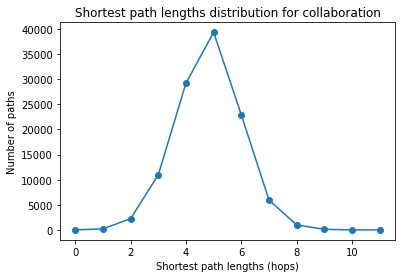

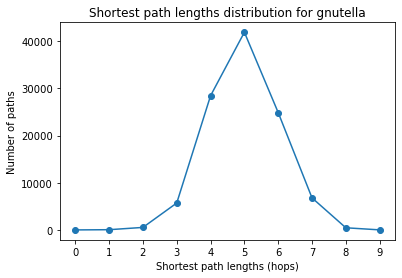

In [19]:
ShortestPaths_Analysis(collaboration, title='Shortest path lengths distribution for collaboration')
ShortestPaths_Analysis(gnutella, title='Shortest path lengths distribution for gnutella')

### Problem 4: Characteristics of random networks

### Erdős-Rényi

Number of vertices in erdos_reyni graph : 10000 
Number of edges in erdos_reyni graph:  50000
Average degree =  10.0
Time taken to calculate the average degree 0.0034682750701904297
Largest component # 1
Time taken to compute the largest component =  0.06647157669067383
Number of vertices: 10000  ( 100.0 ) 
Number of edges:  50000 

Average clustering coefficient:  0.0009522980124450727
Time taken to compute the average clustering coefficient =  0.1978771686553955
This component is too large. Using ten single-source shortest paths.
Average shortest path length =  4.25652
The diameter of the graph is =  6
Time taken to compute the average shortest path length and diameter =  0.4590320587158203


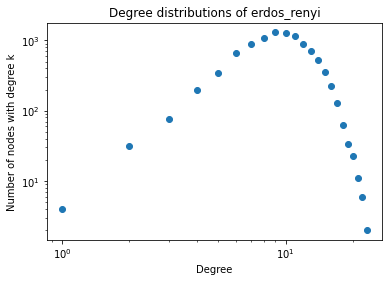

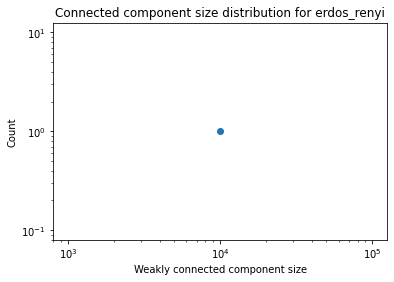

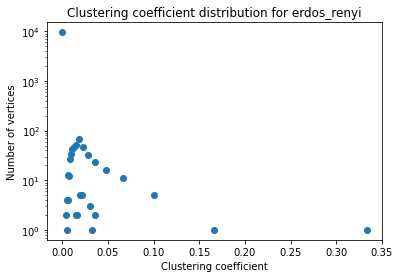

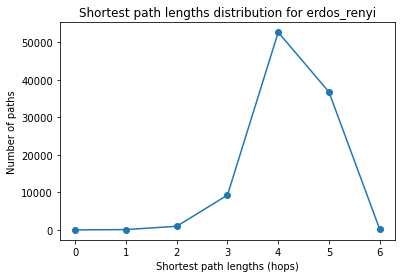

In [20]:
erdos_renyi = nx.gnm_random_graph(10000, 50000)
n = erdos_renyi.number_of_nodes()
m = erdos_renyi.number_of_edges()
print("Number of vertices in erdos_reyni graph :", n, "\nNumber of edges in erdos_reyni graph: ", m)
Degree_Distribution(erdos_renyi, title='Degree distributions of erdos_renyi')
connected_components(erdos_renyi, title='Connected component size distribution for erdos_renyi')
Clustering_Analysis(erdos_renyi, title='Clustering coefficient distribution for erdos_renyi')
ShortestPaths_Analysis(erdos_renyi, title='Shortest path lengths distribution for erdos_renyi')

### Scale-free 

Number of vertices in scale_free graph : 10000 
Number of edges in scale_free graph:  49975
Average degree =  9.995
Time taken to calculate the average degree 0.004037618637084961
Largest component # 1
Time taken to compute the largest component =  0.061408281326293945
Number of vertices: 10000  ( 100.0 ) 
Number of edges:  49975 

Average clustering coefficient:  0.006992636674498841
Time taken to compute the average clustering coefficient =  0.26618385314941406
This component is too large. Using ten single-source shortest paths.
Average shortest path length =  2.64543
The diameter of the graph is =  4
Time taken to compute the average shortest path length and diameter =  0.3733692169189453


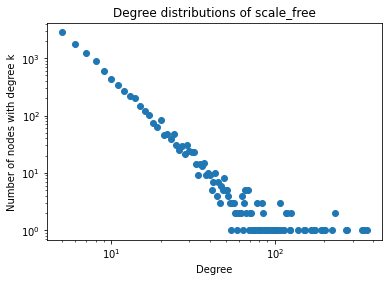

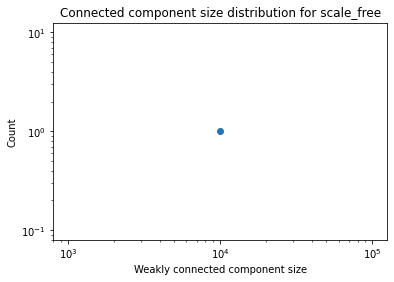

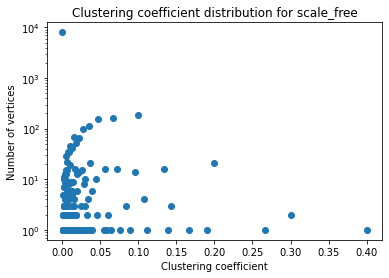

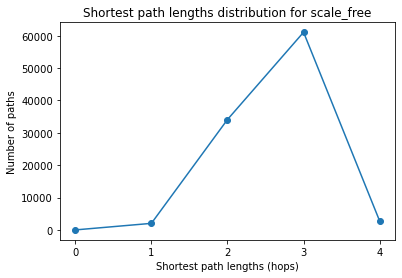

In [21]:
scale_free = nx.barabasi_albert_graph(10000, 5)
n = scale_free.number_of_nodes()
m = scale_free.number_of_edges()
print("Number of vertices in scale_free graph :", n, "\nNumber of edges in scale_free graph: ", m)
Degree_Distribution(scale_free, title='Degree distributions of scale_free')
connected_components(scale_free, title='Connected component size distribution for scale_free')
Clustering_Analysis(scale_free, title='Clustering coefficient distribution for scale_free')
ShortestPaths_Analysis(scale_free, title='Shortest path lengths distribution for scale_free')

### Small-world

Number of vertices in small_world graph : 10000 
Number of edges in small_world graph:  50000
Average degree =  10.0
Time taken to calculate the average degree 0.002167224884033203
Largest component # 1
Time taken to compute the largest component =  0.05378913879394531
Number of vertices: 10000  ( 100.0 ) 
Number of edges:  50000 

Average clustering coefficient:  0.48915426018426067
Time taken to compute the average clustering coefficient =  0.12266349792480469
This component is too large. Using ten single-source shortest paths.
Average shortest path length =  6.14036
The diameter of the graph is =  9
Time taken to compute the average shortest path length and diameter =  0.4005298614501953


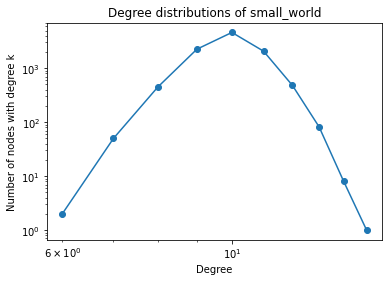

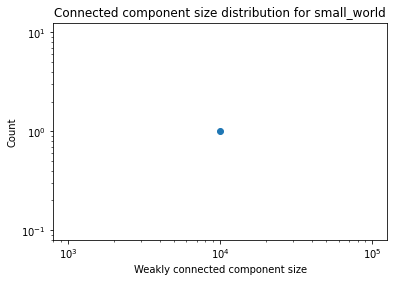

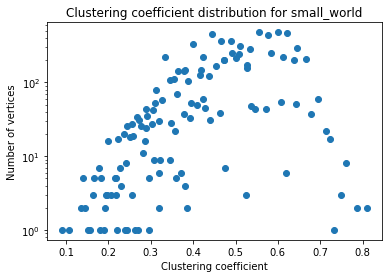

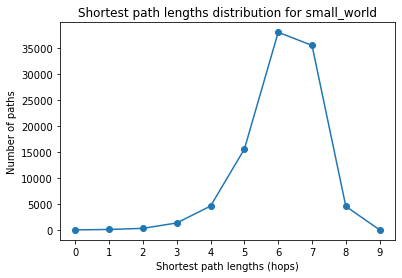

In [22]:
small_world = nx.watts_strogatz_graph(10000, 10, .1)
n = small_world.number_of_nodes()
m = small_world.number_of_edges()
print("Number of vertices in small_world graph :", n, "\nNumber of edges in small_world graph: ", m)
Degree_Distribution(small_world, title='Degree distributions of small_world')
connected_components(small_world, title='Connected component size distribution for small_world')
Clustering_Analysis(small_world, title='Clustering coefficient distribution for small_world')
ShortestPaths_Analysis(small_world, title='Shortest path lengths distribution for small_world')


### Powerlaw and clustered

Number of vertices in powandclust graph : 10000 
Number of edges in powandclust graph:  49962
Average degree =  9.9924
Time taken to calculate the average degree 0.0030100345611572266
Largest component # 1
Time taken to compute the largest component =  0.05739545822143555
Number of vertices: 10000  ( 100.0 ) 
Number of edges:  49962 

Average clustering coefficient:  0.2991611516850094
Time taken to compute the average clustering coefficient =  0.33684778213500977
This component is too large. Using ten single-source shortest paths.
Average shortest path length =  2.56449
The diameter of the graph is =  5
Time taken to compute the average shortest path length and diameter =  0.42310070991516113


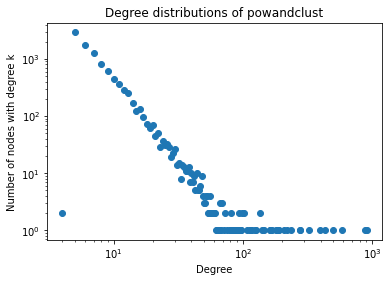

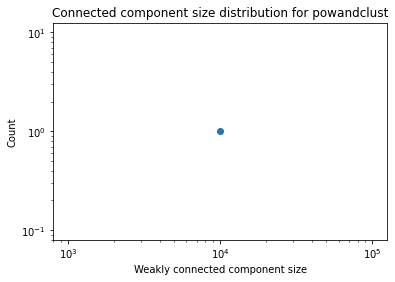

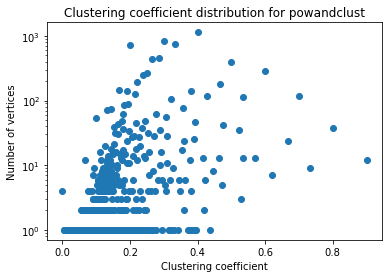

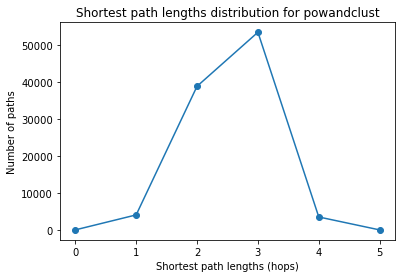

In [23]:
powandclust = nx.powerlaw_cluster_graph(10000, 5, .8)
n = powandclust.number_of_nodes()
m = powandclust.number_of_edges()
print("Number of vertices in powandclust graph :", n, "\nNumber of edges in powandclust graph: ", m)
Degree_Distribution(powandclust, title='Degree distributions of powandclust')
connected_components(powandclust, title='Connected component size distribution for powandclust')
Clustering_Analysis(powandclust, title='Clustering coefficient distribution for powandclust')
ShortestPaths_Analysis(powandclust, title='Shortest path lengths distribution for powandclust')
